


<img src="https://drive.google.com/uc?id=1PPvCl-PonPE7HV3Y73-ox3zhFU8v8moz" width="100%">

What do the shape of a leaf, the branching of lightning, or a romanesco
broccoli have in common?

|![](https://drive.google.com/uc?id=1m4b6UrjU-JKVCcfnNRvZxDE7AuUiVzJz)|![](https://drive.google.com/uc?id=1yRzm51Kyo3ZOvjV4sN64HvLHw6l-gc0c)|![](https://drive.google.com/uc?id=1I3tAHVZfQrhSh5_pJ7cqL4VMal4QNECE) |
|-----------------|-------------------------|---------------------|


Initially, they appear like highly complex shapes – but when you look closer, you might notice that all the individual parts of the plants look exactly the same as the entire plant.

In mathematics this property is called **self-similarity**, and shapes that have it are called fractals.

To create our own fractals, we have to start with a simple pattern and then repeat it over and over again, at smaller scales. Maybe this process reminds you of **recursive algorithms**.

### Real-life applications of fractals

The images at the beginning look just like fractals, but it is impossible to create true fractals in real-life. However, using mathematics, we can think about the properties that real fractals “would” have – and these can be very usefull in many areas of science.


For example, when calculating the perimeter of coastlines or borders, the more you zoom in, the more details you encounter—first river inlets, then bays, cliffs, rocks, pebbles, and so on. This makes it difficult to define an exact length!

<img src="https://drive.google.com/uc?id=1dJiYSwCR7pfnB6Cdi-AnuxUOFDRN1Sk_" width="100%">

This is related to a property called fractal dimension and roughness, studied by Benoît Mandelbrot. His work showed that fractals can help us understand the complexity of natural shapes and patterns, revealing hidden structures in the world around us.

## Some of the most famous fractals

###The Sierpinski Triangle
The Sierpinski Triangle is formed by recursively subdividing a triangle into smaller triangles. It starts with a single triangle, and at each step, the triangle is divided into four smaller triangles, with the central triangle being removed.

>Before creating the function we need to import the libraries of use and create the polygon of choice.

In [1]:
# Import Necessary Libraries
import matplotlib.pyplot as plt
import numpy as np

# Define the Function to Plot the Triangle based on its vertices
def plot_triangle(vertices, ax):
    triangle = plt.Polygon(vertices, edgecolor='b', fill=None)
    ax.add_patch(triangle)

Now's the turn for the actual **Sierpinski** function
>First, we have to find the midpoints of the three sides of the polygon.\
Then, Connect these midpoints to form a smaller equilateral polygon in the center.

In [2]:
# Define the Recursive Function to Create the Sierpinski Triangle
def sierpinski(vertices, depth, ax):
    if depth == 0:
        plot_triangle(vertices, ax)
    else:
        # Calculate the mid-points of each side
        mid_point_01 = (vertices[0] + vertices[1]) / 2
        mid_point_12 = (vertices[1] + vertices[2]) / 2
        mid_point_20 = (vertices[0] + vertices[2]) / 2

        # Recursive calls for each of the 3 smaller triangles
        sierpinski([vertices[0], mid_point_01, mid_point_20], depth-1, ax)
        sierpinski([vertices[1], mid_point_12, mid_point_01], depth-1, ax)
        sierpinski([vertices[2], mid_point_20, mid_point_12], depth-1, ax)
        plot_triangle(vertices, ax)

Turn to run the Code
>Lastly, we have to visualize the polygon:

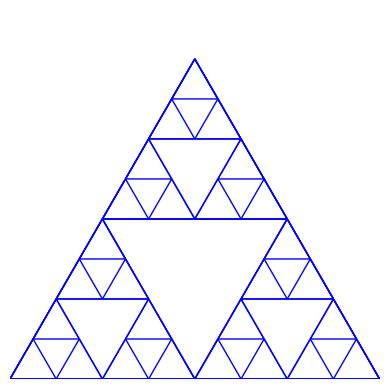

In [3]:
# Create the Sierpinski Triangle
if __name__ == '__main__':
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.set_axis_off()
    vertices = np.array([[0, 0], [1, 0], [0.5, np.sin(np.pi/3)]])

    depth = 3  # Repetitions of scale
    sierpinski(vertices, depth, ax)
    plt.show()

### The Mandelbrot Set
The Mandelbrot Set is a collection of points in the complex plane (a plane where each point represents a complex number). It is defined by the behavior of a simple equation:

$$
z_{n+1} = z_n^2 + c
$$

where:
- \( z \) is a complex number that starts at **0**.
- \( c \) is a complex number that represents each point in the plane.


If the sequence of 𝑧 values stays within a certain boundary (doesn't go to infinity), then the point 𝑐 belongs to the Mandelbrot Set. If it escapes to infinity, it does not belong to the set. When plotted, this creates the iconic bug-like shape with intricate details.

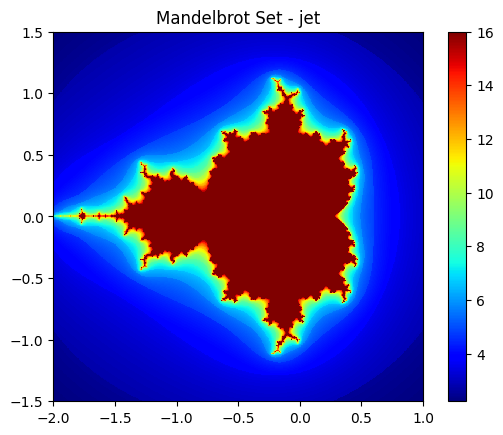

In [4]:
def mandelbrot(c, max_iter):
    z = 0 # Starting value
    n = 0
    while abs(z) <= 3 and n < max_iter: # Loop to update z
        z = z*z + c
        n += 1
    if n == max_iter: # Check threshold
        return max_iter # Returns iterations needed to diverge
    return n + 1 - np.log(np.log2(abs(z))) # or not, applying normalization using log interpolation

def mandelbrot_set(xmin, xmax, ymin, ymax, width, height, max_iter):
    r1 = np.linspace(xmin, xmax, width) # Linear space for real values
    r2 = np.linspace(ymin, ymax, height) # Linear space for imaginary values
    return (r1, r2, np.array([[mandelbrot(complex(r, i), max_iter) for r in r1] for i in r2]))
    # Each element on the output tuple represents the iteration count of divergence for that complex number

def display_fractal(matrix, cmap='jet'):
    plt.imshow(matrix, extent=(-2.0, 1.0, -1.5, 1.5), interpolation='nearest', cmap=cmap)
    plt.colorbar()
    plt.title(f'Mandelbrot Set - {cmap}')
    plt.show()

x_min, x_max = -2.0, 1.0
y_min, y_max = -1.5, 1.5
width, height = 1000, 1000
max_iter =16

r1, r2, m = mandelbrot_set(x_min, x_max, y_min, y_max, width, height, max_iter)
display_fractal(m)


### The Julia Sets
in Julia Sets, 𝑐 is fixed while different starting values of 𝑧 are tested. This creates different Julia fractals for different values of 𝑐.

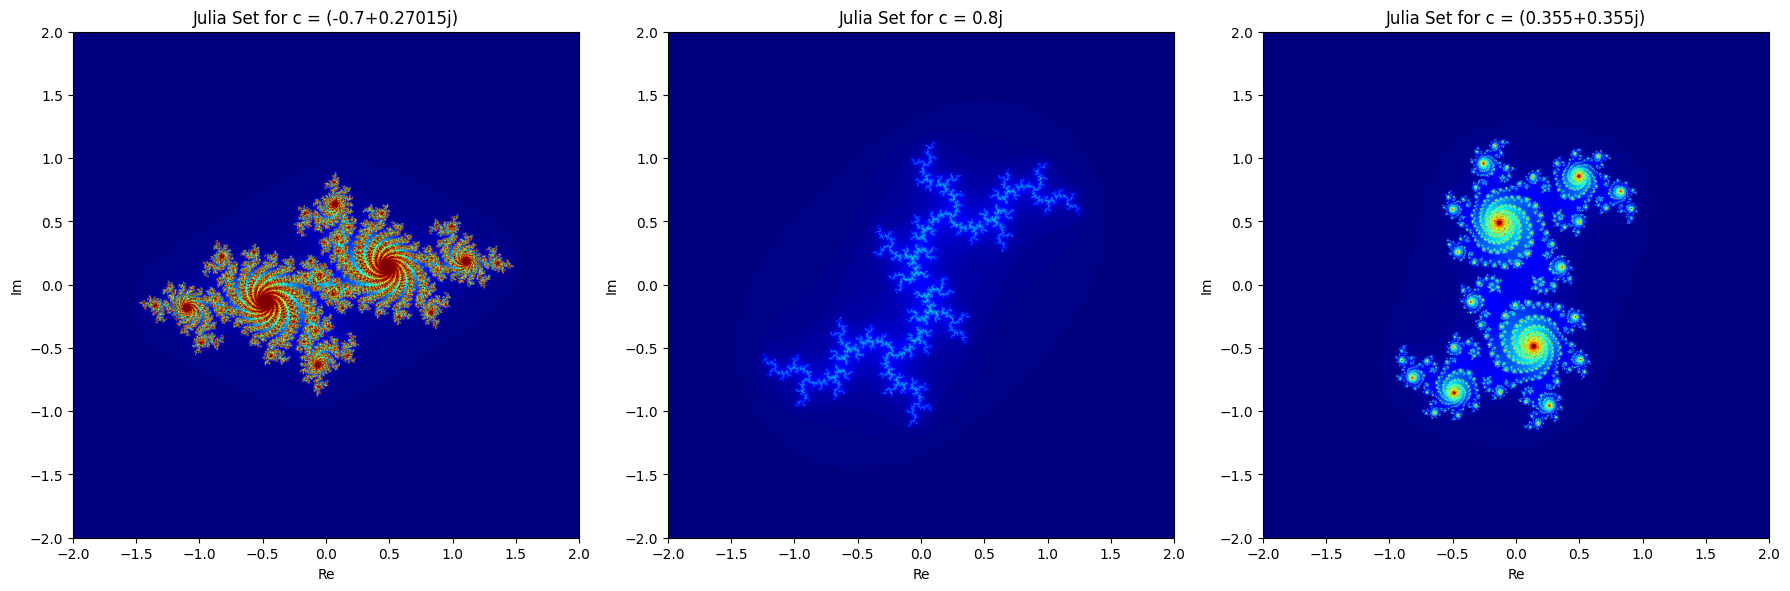

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Function to compute the Julia set
def julia_set(width, height, zoom, c, max_iter=300):
    x = np.linspace(-2, 2, width)
    y = np.linspace(-2, 2, height)
    X, Y = np.meshgrid(x, y)
    Z = X + 1j * Y

    img = np.zeros(Z.shape, dtype=int)

    for i in range(max_iter):
        mask = np.abs(Z) < 2
        img[mask] = i
        Z[mask] = Z[mask]**2 + c

    return img

# Parameters
width, height = 1000, 1000
zoom = 2.0
c_values = [
    complex(-0.7, 0.27015),
    complex(0, +0.8),
    complex(0.355, 0.355)
]

# Generate and plot the Julia sets for each c
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for ax, c in zip(axes, c_values):
    julia = julia_set(width, height, zoom, c)
    ax.imshow(julia, cmap='jet', extent=[-2, 2, -2, 2])
    ax.set_title(f'Julia Set for c = {c}')
    ax.set_xlabel('Re')
    ax.set_ylabel('Im')

plt.tight_layout()
plt.show()


https://mathigon.org/course/fractals/mandelbrot

## A little Game

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import random
from IPython.display import display, clear_output

# Funcions per generar fractals
def mandelbrot_set(width, height, zoom=1, x_offset=0, y_offset=0, max_iter=100):
    x = np.linspace(-2.0 / zoom + x_offset, 2.0 / zoom + x_offset, width)
    y = np.linspace(-2.0 / zoom + y_offset, 2.0 / zoom + y_offset, height)
    X, Y = np.meshgrid(x, y)
    C = X + 1j * Y
    Z = np.zeros_like(C, dtype=complex)
    img = np.zeros(C.shape, dtype=int)

    for i in range(max_iter):
        mask = np.abs(Z) < 2
        Z[mask] = Z[mask]**2 + C[mask]
        img[mask] += 1

    return img

def julia_set(width, height, c, zoom=1, x_offset=0, y_offset=0, max_iter=100):
    x = np.linspace(-2.0 / zoom + x_offset, 2.0 / zoom + x_offset, width)
    y = np.linspace(-2.0 / zoom + y_offset, 2.0 / zoom + y_offset, height)
    X, Y = np.meshgrid(x, y)
    Z = X + 1j * Y
    img = np.zeros(Z.shape, dtype=int)

    for i in range(max_iter):
        mask = np.abs(Z) < 2
        Z[mask] = Z[mask]**2 + c
        img[mask] += 1

    return img

def sierpinski_triangle(n):
    points = np.array([[0, 0], [1, 0], [0.5, np.sqrt(3)/2]])
    p = np.random.rand(1, 2)
    res = [p]

    for _ in range(n):
        p = (p + random.choice(points)) / 2
        res.append(p)

    return np.vstack(res) + np.random.normal(0, 0.005, (n+1, 2))

# Funció per generar una imatge que no sigui un fractal però que s'hi assemlli
def random_pattern(width, height):
    img = np.random.rand(height, width)
    img = np.sin(img * 10)  # Aplicar una transformació per fer-ho més interessant
    return img

fractals = [
    "Mandelbrot", "Julia", "Julia", "Sierpinski", "No és un fractal", "No és un fractal"
]

output = widgets.Output()
used_variations = []
score = 0
score_display = widgets.Label(value=f"Puntuació: {score}")

def generate_fractal():
    global correct_answer, used_variations, score

    if len(used_variations) == 6:  # Limitem el nombre de rondes a 6
        clear_output(wait=True)
        print(f"Joc finalitzat! Puntuació final: {score}")
        return

    if len(used_variations) == 0:
        score = 0
        score_display.value = f"Puntuació: {score}"

    # Garantir que no es repeteixi el mateix fractal
    correct_answer = random.choice(fractals)
    while correct_answer in used_variations:
        correct_answer = random.choice(fractals)
    used_variations.append(correct_answer)

    with output:
        clear_output(wait=True)
        plt.figure(figsize=(5,5))

        if correct_answer == "Mandelbrot":
            plt.imshow(mandelbrot_set(400, 400, zoom=1), cmap='inferno')

        elif correct_answer == "Julia":
            c = complex(-0.4 + random.choice([0, 0.2]), 0.6 - random.choice([0, 0.3]))
            plt.imshow(julia_set(400, 400, c, zoom=1), cmap='inferno')

        elif correct_answer == "Sierpinski":
            sierpinski = sierpinski_triangle(10000 + random.choice([0, 5000]))
            noise = np.random.normal(0, 0.005, sierpinski.shape)
            sierpinski += noise
            plt.scatter(sierpinski[:,0], sierpinski[:,1], s=0.1, color='black')

        elif correct_answer == "No és un fractal":
            img = random_pattern(400, 400)
            plt.imshow(img, cmap='inferno')

        plt.axis("off")
        plt.show()

def check_answer(choice):
    global score
    if choice == correct_answer:
        score += 1
        print("✅ Correcte!")
    else:
        print(f"❌ Incorrecte! La resposta era {correct_answer}.")
    score_display.value = f"Puntuació: {score}"
    generate_fractal()
generate_fractal()

# Botons per seleccionar les respostes
button_mandelbrot = widgets.Button(description="Mandelbrot")
button_julia = widgets.Button(description="Julia")
button_sierpinski = widgets.Button(description="Sierpinski")
button_not_fractal = widgets.Button(description="No és un fractal")

# Funcions associades a cada botó
button_mandelbrot.on_click(lambda _: check_answer("Mandelbrot"))
button_julia.on_click(lambda _: check_answer("Julia"))
button_sierpinski.on_click(lambda _: check_answer("Sierpinski"))
button_not_fractal.on_click(lambda _: check_answer("No és un fractal"))

# Mostrar el joc
display(output)
display(button_mandelbrot, button_julia, button_sierpinski, button_not_fractal, score_display)


Output()

Button(description='Mandelbrot', style=ButtonStyle())

Button(description='Julia', style=ButtonStyle())

Button(description='Sierpinski', style=ButtonStyle())

Button(description='No és un fractal', style=ButtonStyle())

Label(value='Puntuació: 0')

# Challenge

To create a snowflake, we will be using the method we saw earlier using a process of iteration: you start with a specific pattern, and then you repeat it over and over again.

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Function to apply L-system rules for the given number of iterations
def apply_rules(axiom, rules, iterations):
    for _ in range(iterations):
        axiom = ''.join([rules.get(symbol, symbol) for symbol in axiom])
    return axiom

# Function to interpret the L-system string and plot the resulting fractal
def plot_l_system(axiom, rules, iterations, angle, length=1.0):
    axiom = apply_rules(axiom, rules, iterations)

    # Set up the plot
    fig, ax = plt.subplots(figsize=(8, 8))
    fig.patch.set_facecolor('black')  # Set figure background to black
    ax.set_facecolor('black')  # Set axes background to black
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])

    # Count the number of "F" symbols to get the correct color range
    num_segments = sum(1 for char in axiom if char == 'F')

    # Generate a color list based on the number of actual line segments
    color_list = plt.cm.plasma(np.linspace(0, 1, num_segments))

    # Starting position and orientation
    x, y = 0, 0
    direction = 0  # Angle in degrees
    stack = []

    color_idx = 0  # Initialize the color index for cycling

    # Start drawing the fractal based on the axiom
    for symbol in axiom:
        if symbol == 'F':  # Move forward and draw a line
            # Get the color for the current segment
            current_color = color_list[color_idx]
            x_new = x + np.cos(np.radians(direction)) * length
            y_new = y + np.sin(np.radians(direction)) * length
            ax.plot([x, x_new], [y, y_new], color=current_color, lw=1)
            x, y = x_new, y_new

            color_idx += 1  # Only increment for "F"


        elif symbol == '+':  # Turn right by the specified angle
            direction += angle
        elif symbol == '-':  # Turn left by the specified angle
            direction -= angle

    plt.title(f'{title}')
    plt.show()

With the code given above we will plot 4 iterations of the well known **Kock Snowflake**

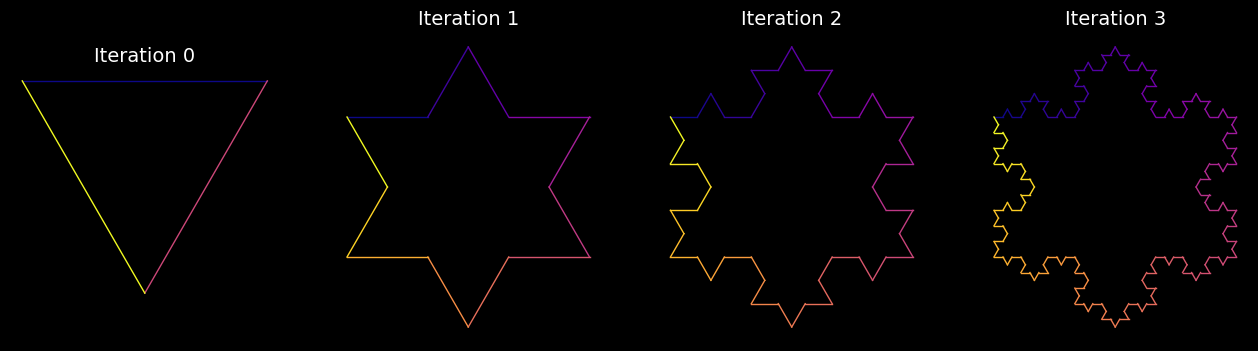

In [8]:
import matplotlib.pyplot as plt

# Parameters for the Koch Snowflake
title = "Koch-Snowflake"
axiom = "F--F--F"
rules = {"F": "F+F--F+F"}
angle = 60

# Create a figure with 4 subplots
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
fig.patch.set_facecolor('black')

# Modify plot_l_system to accept an existing axis
def plot_l_system_on_ax(ax, axiom, rules, iterations, angle, length=1.0):
    axiom = apply_rules(axiom, rules, iterations)

    ax.set_facecolor('black')
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])

    num_segments = sum(1 for char in axiom if char == 'F')
    color_list = plt.cm.plasma(np.linspace(0, 1, num_segments))

    x, y = 0, 0
    direction = 0  # Angle in degrees
    stack = []
    color_idx = 0

    for symbol in axiom:
        if symbol == 'F':
            current_color = color_list[color_idx]
            x_new = x + np.cos(np.radians(direction)) * length
            y_new = y + np.sin(np.radians(direction)) * length
            ax.plot([x, x_new], [y, y_new], color=current_color, lw=1)
            x, y = x_new, y_new
            color_idx += 1
        elif symbol == '+':
            direction += angle
        elif symbol == '-':
            direction -= angle

# Call the function for each subplot
for i in range(4):
    plot_l_system_on_ax(axes[i], axiom, rules, i, angle)
    axes[i].set_title(f"Iteration {i}", fontsize=14, color="white")

plt.show()


Here are some more examples:

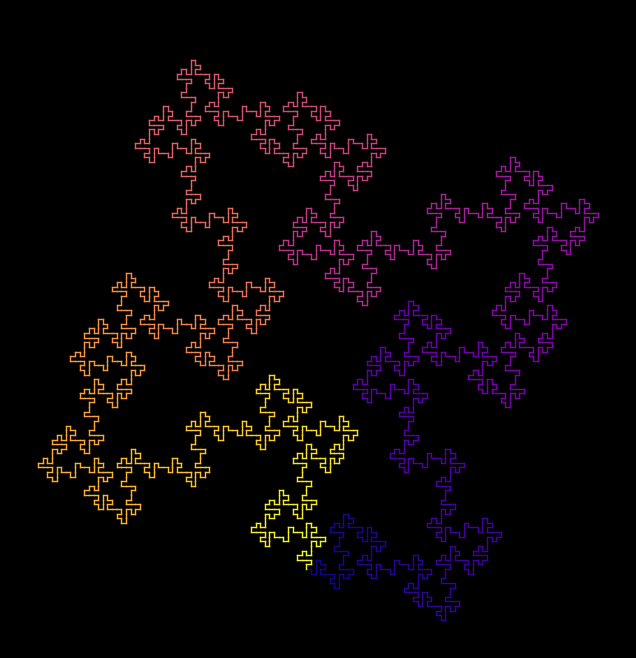

In [9]:
# Example 2: Quadratic Koch Island
title = "Quadratic-Koch-Island"
axiom = "F+F+F+F"
rules = {"F": "F-F+F+FFF-F-F+F"}
iterations = 3  # TOP: 4
angle = 90
plot_l_system(axiom, rules, iterations, angle)



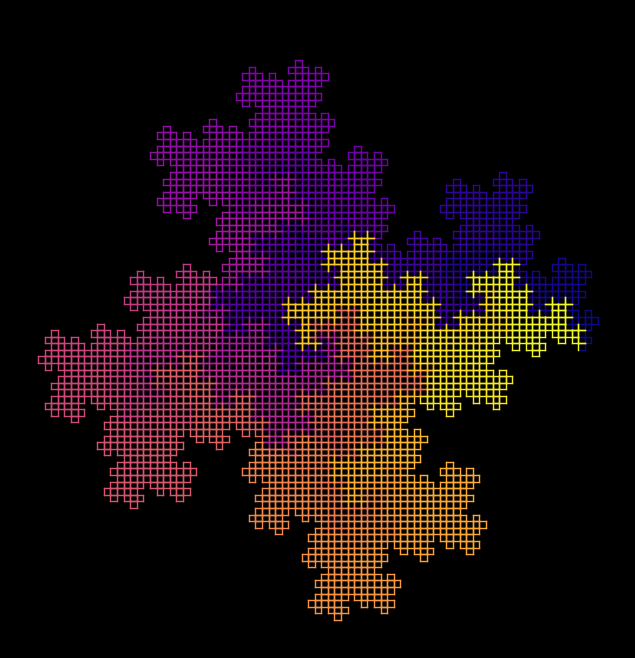

In [10]:
# Example 3: Cross
title = "Cross"
axiom = "F+F+F+F"
rules = {"F":"F+FF++F+F"}
iterations = 5 # TOP: 6
angle = 90
plot_l_system(axiom, rules, iterations, angle)


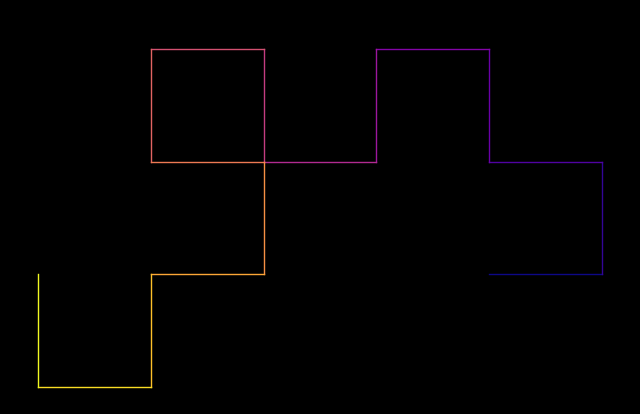

In [11]:
# Example 4: Dragon Tale
title = "Dragon Tale"
axiom = "FX"
rules = {"X":"X+YF+", "Y":"-FX-Y"}
iterations = 4 # TOP: 16
angle = 90
plot_l_system(axiom, rules, iterations, angle)


Your challenge is to create your own snowflake:  

Explanation:
apply_rules(): This function takes the axiom (starting string) and applies the transformation rules for the given number of iterations.
plot_l_system(): This function interprets the resulting string after the L-system transformations and plots the fractal using Matplotlib.
- F: Draws a line forward.
- +: Turns the drawing direction to the right by the given angle.
- -: Turns the drawing direction to the left by the given angle.

Parameters:
- axiom: The starting string of symbols.
- rules: The transformation rules to apply to the symbols.
- iterations: The number of times to apply the transformation rules.
- angle: The angle to turn the direction by when encountering + or -.
- length: The length of each line segment, default is 1.0.

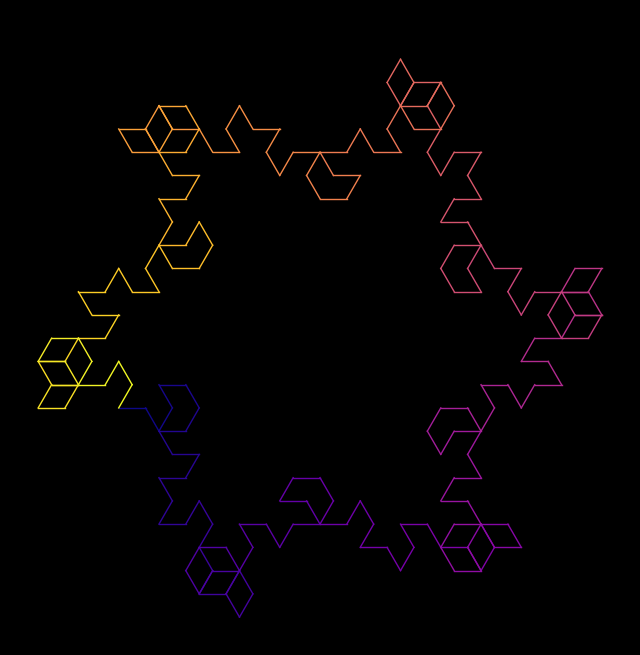

In [12]:
# Write your code here

title = "Frozen Snowflake" # Name your snowflake
axiom = "F++F++F++F++F++F" # write your axioms
rules = {"F": "F-F++F+F--F-F"} # write the rules
iterations = 2 # start wih 2 iterations to see your axiom and later you can increment the iterations
angle = 60 # specify the angle
plot_l_system(axiom, rules, iterations, angle)


# Function to apply L-system rules for the given number of iterations
def apply_rules(axiom, rules, iterations):
    for _ in range(iterations):
        axiom = ''.join([rules.get(symbol, symbol) for symbol in axiom])
    return axiom

# Function to interpret the L-system string and plot the resulting fractal
def plot_l_system(axiom, rules, iterations, angle, length=10.0):
    axiom = apply_rules(axiom, rules, iterations)

    # Set up the plot
    fig, ax = plt.subplots(figsize=(8, 8))
    fig.patch.set_facecolor('black')  # Set figure background to black
    ax.set_facecolor('black')  # Set axes background to black
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])

    # Count the number of "F" symbols to get the correct color range
    num_segments = sum(1 for char in axiom if char == 'F')
    color_list = plt.cm.cool(np.linspace(0, 1, num_segments))  # Cool winter colors ❄️

    # Starting position and orientation
    x, y = 0, 0
    direction = 0  # Angle in degrees
    stack = []

    color_idx = 0  # Initialize the color index for cycling

    # Start drawing the fractal based on the axiom
    for symbol in axiom:
        if symbol == 'F':  # Move forward and draw a line
            current_color = color_list[color_idx]
            x_new = x + np.cos(np.radians(direction)) * length
            y_new = y + np.sin(np.radians(direction)) * length
            ax.plot([x, x_new], [y, y_new], color=current_color, lw=1)
            x, y = x_new, y_new
            color_idx += 1  # Only increment for "F"

        elif symbol == '+':  # Turn right by the specified angle
            direction += angle
        elif symbol == '-':  # Turn left by the specified angle
            direction -= angle

    plt.title(f'{title}', color='white')
    plt.show()
